# Aula 1 - Análise do Dataset
O dataset utilizado será o [Iris flower data set](https://en.wikipedia.org/wiki/Iris_flower_data_set). Ele possui informações de 3 tipos de flores Iris.

Este dataset possui 4 características (features) relevantes dos dados:
- Comprimento das sépalas
- Largura das sépalas
- Comprimento das pétalas
- Largura das pétalas

O o nosso objetivo é, a partir destas informações, classificar o tipo da flor. As possíveis calssificações são:
- Iris Setosa
- Iris Virginica
- Iris Versicolor

## 1) Vizualização do dataset

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

### Carregar o dataset

O sklearn (a.k.a. scikit-learn) possui datasets simples prontos. Eles podem ser encntrados [aqui](https://scikit-learn.org/stable/datasets/index.html#toy-datasets). Um deles, que vamos utilizar agora, é o dataset de [flores Iris](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris).

In [2]:
from sklearn import datasets
iris_dataset = datasets.load_iris() #retorna um dicionátio com os dados

In [3]:
iris_dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
print('As features (entradas) são: {}'.format(iris_dataset['feature_names']))
print('Os targets (saídas) são: {}'.format(iris_dataset['target_names']))

As features (entradas) são: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Os targets (saídas) são: ['setosa' 'versicolor' 'virginica']


In [5]:
iris_dataset.data[:5]
#['sepal length', 'sepal width', 'petal length', 'petal width']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [6]:
iris_dataset.target
# 0 -> 'setosa'
# 1 -> 'versicolor'
# 2 -> 'virginica'

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Analisar o dataset
Quando vamos analisar um dataset, precisamos basicamente verificar duas coisas:

1) O dataset está balanceado?

2) Quais features são relevantes para utilizar como entrada do modelo?

In [7]:
X = iris_dataset.data
y = iris_dataset.target

In [8]:
print('O tamanho do dataset é: {}'.format(len(X)))

O tamanho do dataset é: 150


#### O dadaset está balanceado?

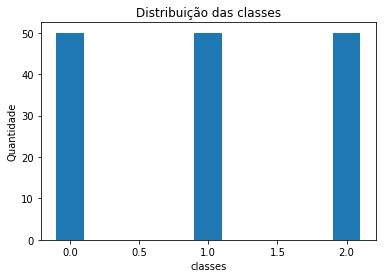

In [9]:
plt.hist(y,  bins= [-0.1,0.1,0.9,1.1,1.9,2.1], align='mid')
plt.ylabel("Quantidade")
plt.xlabel("classes")
plt.title("Distribuição das classes")
plt.show()

#### Como cada feature está distribuida?

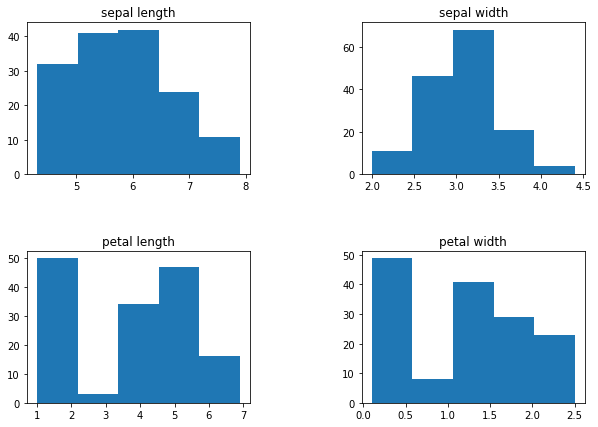

In [10]:
fig = plt.figure(figsize=(10,7))

ax1 = fig.add_subplot(2,2,1) #.add_subplot(num_linhas, num_colunas, id_do_subplot)
ax1.hist(X[:,0],  bins=5, align='mid')
ax1.set_title('sepal length')

ax2 = fig.add_subplot(2,2,2)
ax2.hist(X[:,1],  bins=5, align='mid')
ax2.set_title('sepal width')

ax3 = fig.add_subplot(2,2,3)
ax3.hist(X[:,2],  bins=5, align='mid')
ax3.set_title('petal length')

ax4 = fig.add_subplot(2,2,4)
ax4.hist(X[:,3],  bins=5, align='mid')
ax4.set_title('petal width')

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

#### As features influenciam a classe?

O que é um boxplot (diagrama de caixa)? [link1](https://pt.wikipedia.org/wiki/Diagrama_de_caixa), [link2](http://www.abgconsultoria.com.br/blog/boxplot-como-interpretar/)

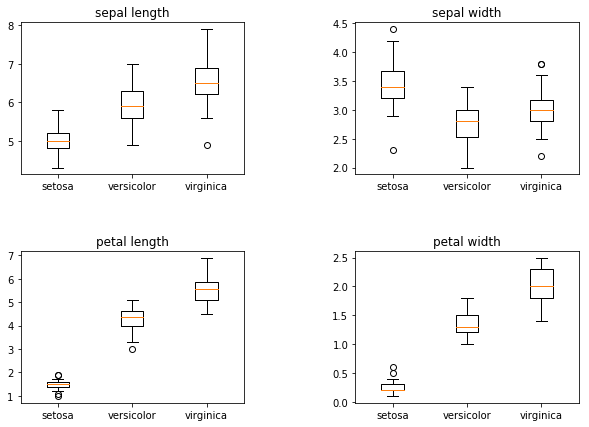

In [11]:
fig = plt.figure(figsize=(10,7))

ax1 = fig.add_subplot(2,2,1)
ax1.boxplot([X[:50, 0], X[50:100, 0], X[100:150, 0]])
ax1.set_xticklabels(iris_dataset['target_names'])
ax1.set_title('sepal length')

ax2 = fig.add_subplot(2,2,2)
ax2.boxplot([X[:50, 1], X[50:100, 1], X[100:150, 1]])
ax2.set_xticklabels(iris_dataset['target_names'])
ax2.set_title('sepal width')

ax3 = fig.add_subplot(2,2,3)
ax3.boxplot([X[:50, 2], X[50:100, 2], X[100:150, 2]])
ax3.set_xticklabels(iris_dataset['target_names'])
ax3.set_title('petal length')

ax4 = fig.add_subplot(2,2,4)
ax4.boxplot([X[:50, 3], X[50:100, 3], X[100:150, 3]])
ax4.set_xticklabels(iris_dataset['target_names'])
ax4.set_title('petal width')

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

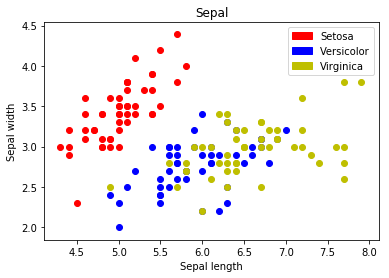

In [12]:
color = ['r', 'b', 'y']
for (sepal_length, sepal_width), classe in zip(X[:, :2], y):
    plt.scatter(sepal_length, sepal_width, color=color[classe])

plt.ylabel("Sepal width")
plt.xlabel("Sepal length")
plt.title("Sepal")

setosa_patch = mpatches.Patch(color=color[0], label='Setosa')
versicolor_patch = mpatches.Patch(color=color[1], label='Versicolor')
virginica_patch = mpatches.Patch(color=color[2], label='Virginica')
plt.legend(handles=[setosa_patch, versicolor_patch, virginica_patch])

plt.show()

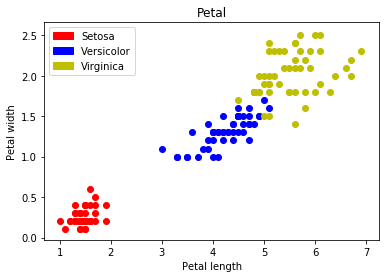

In [13]:
color = ['r', 'b', 'y']
for (petal_length, petal_width), classe in zip(X[:, 2:], y):
    plt.scatter(petal_length, petal_width, color=color[classe])

plt.ylabel("Petal width")
plt.xlabel("Petal length")
plt.title("Petal")

setosa_patch = mpatches.Patch(color=color[0], label='Setosa')
versicolor_patch = mpatches.Patch(color=color[1], label='Versicolor')
virginica_patch = mpatches.Patch(color=color[2], label='Virginica')
plt.legend(handles=[setosa_patch, versicolor_patch, virginica_patch])

plt.show()

#### Conclusão
As classes estão distribuidas e são relevantes para cada classe. Logo, vamos usar todas as features (`'sepal length', 'sepal width', 'petal length', 'petal width'`)